In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.ndimage as nd

In [ ]:
 def generate_rectangle(x_size, y_size, x_b, y_b, width, heigth):
   image = np.zeros((y_size, x_size))
   image[y_b:y_b+heigth, x_b:x_b+width] = 1
   return image

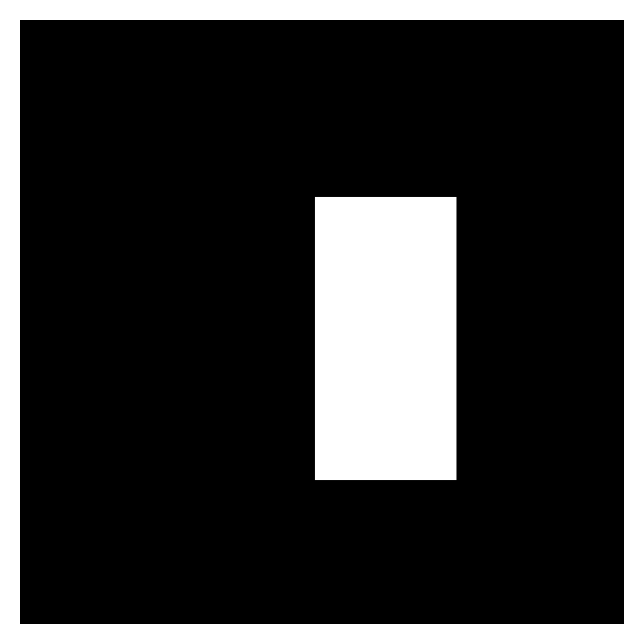

In [ ]:
x_size, y_size = 512, 512
x_b, y_b = 250, 150
width, height = 120, 240

rectangle = generate_rectangle(x_size, y_size, x_b, y_b, width, height)

plt.figure(dpi=200)
plt.imshow(rectangle, cmap='gray')
plt.axis('off')
plt.show()

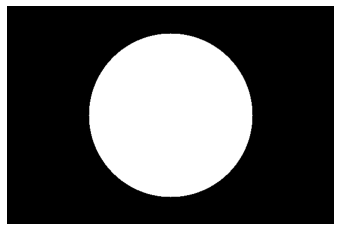

In [ ]:
def generate_circle(x_size, y_size, x_origin, y_origin, radius):
  image = np.zeros((y_size, x_size))
  #circ = lambda x_size, y_size: np.sqrt(np.power(x_size - x_origin, 2) + np.power(y_size - y_origin, 2)) < radius
  for y_coord in range(y_size):
    for x_coord in range (x_size):
      if (x_coord - x_origin)**2 + (y_coord-y_origin)**2 <= radius*radius :
        image [y_coord,x_coord] = 1
        
  
  return image


x_size, y_size = 600, 400
x_origin, y_origin = 300, 200
radius = 150

circle = generate_circle(x_size, y_size, x_origin, y_origin, radius)
#plt.figure(dpi=200)
plt.imshow(circle, cmap='gray')
plt.axis('off')
plt.show()

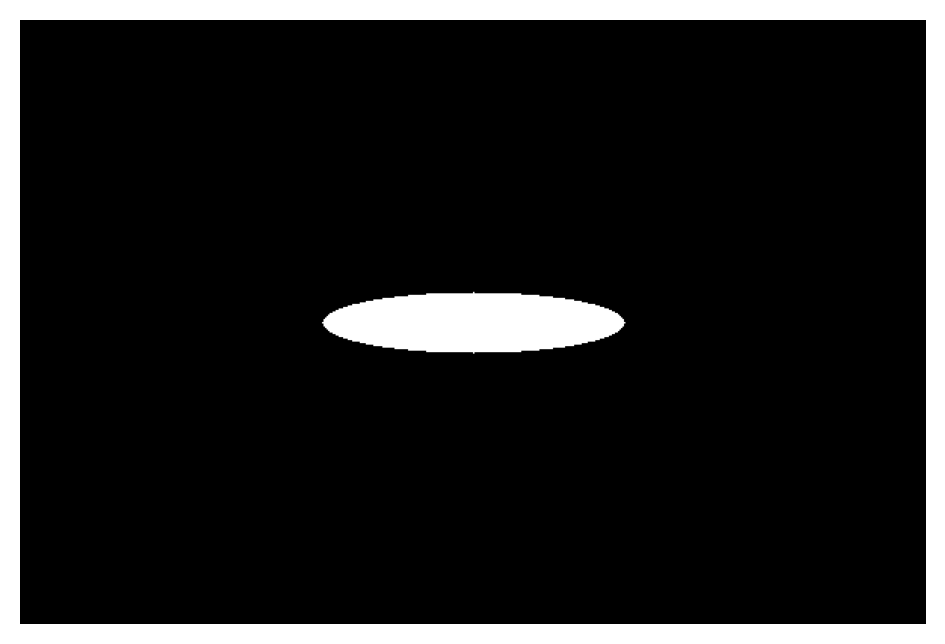

In [ ]:
def generate_elip(x_size, y_size,x_origin,y_origin,  a, b):
  image = np.zeros((y_size, x_size))

  for y_coord in range(y_size):
    for x_coord in range (x_size):
      if ( ((x_coord - x_origin)**2)*(b**2) + ((y_coord-y_origin)**2)*(a**2) - (a**2)*(b**2)  ) <= 0 :
        image [y_coord,x_coord] = 1
        

  return image

x_size, y_size = 600, 400
a_origin, b_origin = 300, 200
r_x, r_y = 100, 20


elip = generate_elip(x_size, y_size, a_origin, b_origin, r_x, r_y)
plt.figure(dpi=200)
plt.imshow(elip, cmap='gray')
plt.axis('off')
plt.show()

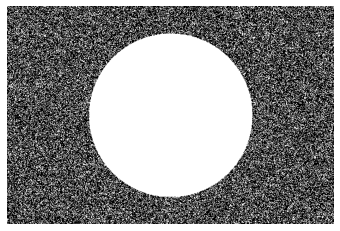

In [ ]:
#Adding binary noise

def generateNoise(x_size, y_size,image):
  for x in range(x_size):
    for y in range(y_size):
      if (np.random.normal()>0.5 ):
        image[y,x]=1;
        
  return image

circleNoise = generateNoise(x_size, y_size, circle)
plt.figure()
plt.imshow(circleNoise , cmap='gray')
plt.axis('off')
plt.show()

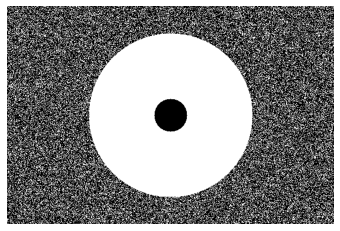

In [ ]:
#Adding hole to the circle
x_size, y_size = 600, 400
x_origin, y_origin = 300, 200
radius = 30

circle_smaller = generate_circle(x_size, y_size, x_origin, y_origin, radius)
circle_smaller = np.logical_not(circle_smaller)
circleNoise_Smaller = np.logical_and(circleNoise, circle_smaller)

plt.figure()
plt.imshow(circleNoise_Smaller, cmap='gray')
plt.axis('off')
plt.show()

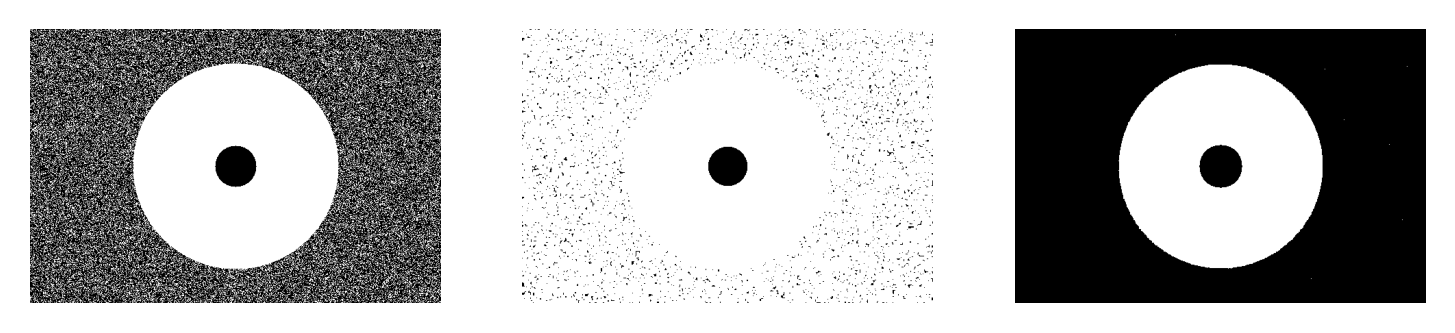

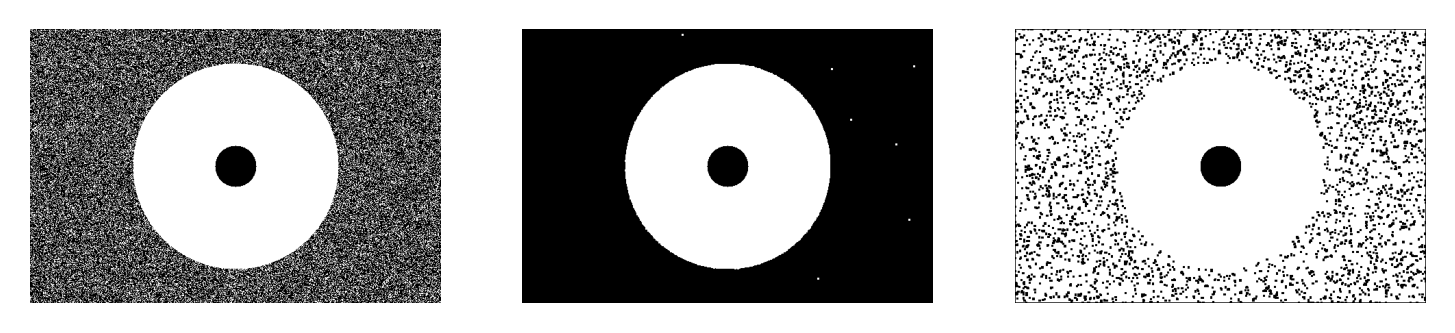

In [ ]:
#Dilation/Erosion/Opening/Closing
dilated_circle = nd.binary_dilation(circleNoise_Smaller , np.ones((3, 3)))
eroded_circle = nd.binary_erosion(circleNoise_Smaller , np.ones((3, 3)))
circle_after_opening = nd.binary_opening(circleNoise_Smaller , np.ones((3, 3)))
circle_after_closing = nd.binary_closing(circleNoise_Smaller , np.ones((3, 3)))


plt.figure(dpi=300)
plt.subplot(1, 3, 1)
plt.imshow(circleNoise_Smaller, cmap='gray')
plt.axis('off')
plt.subplot(1, 3, 2)
plt.imshow(dilated_circle, cmap='gray')
plt.axis('off')
plt.subplot(1, 3, 3)
plt.imshow(eroded_circle, cmap='gray')
plt.axis('off')
plt.show()

plt.figure(dpi=300)
plt.subplot(1, 3, 1)
plt.imshow(circleNoise_Smaller, cmap='gray')
plt.axis('off')
plt.subplot(1, 3, 2)
plt.imshow(circle_after_opening, cmap='gray')
plt.axis('off')
plt.subplot(1, 3, 3)
plt.imshow(circle_after_closing, cmap='gray')
plt.axis('off')
plt.show()

(-0.5, 4.5, 4.5, -0.5)

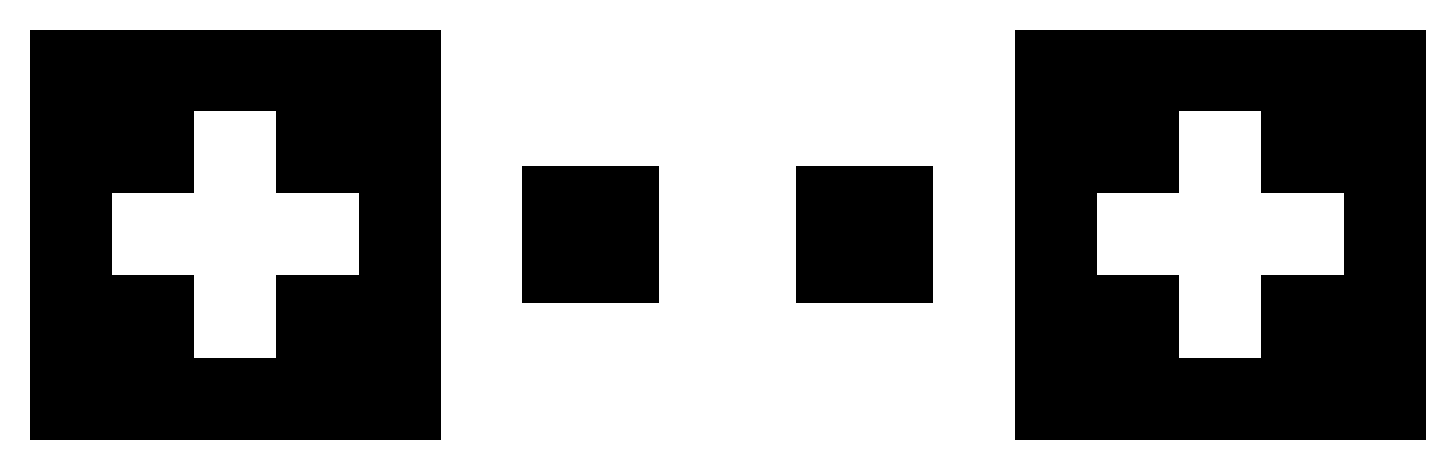

In [ ]:
image=np.array([[0,0,0,0,0], [0,0,1,0,0], [0,1,1,1,0], [0,0,1,0,0],[0,0,0,0,0]])
se=np.array([[0,1,0]])

new_matrix = np.zeros((image.shape[0],image.shape[1]))
for y in range (1,image.shape[0]-1):
  for x in range (1,image.shape[1]):
    if x+2 <= image.shape[1]:
      temp = np.max((image[y,x-1:x+2])*se) 
      new_matrix[y,x] = temp

plt.figure(dpi=300)
plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray')
plt.axis('off')
plt.subplot(1, 3, 2)
plt.imshow(se, cmap='gray')
plt.axis('off')
plt.subplot(1, 3, 3)
plt.imshow(new_matrix, cmap='gray')
plt.axis('off')  



(-0.5, 7.5, 9.5, -0.5)

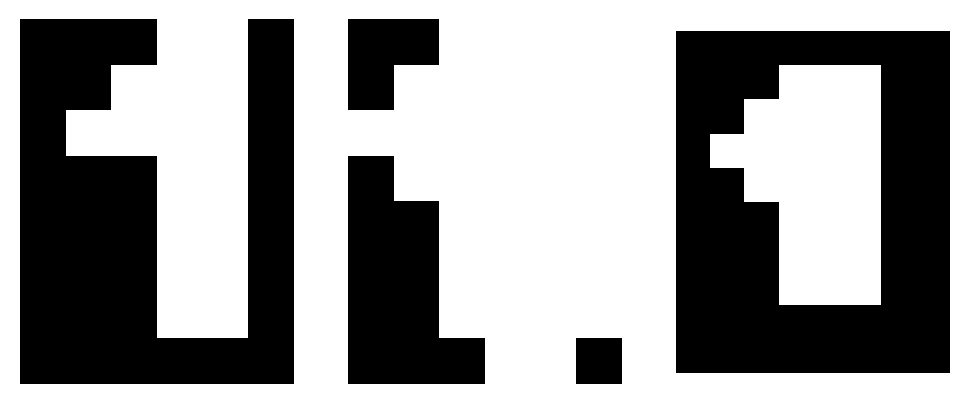

In [ ]:
def our_dilation(image, se):
 
  def generate_size(se, coord):
    if se.shape[coord]==1:
      return 1
    else:
      return int((se.shape[coord] - se.shape[coord]%2)/2)

  dim_y = generate_size(se, 0) 
  dim_x = generate_size(se, 1) 
  
  new_matrix_y=image.shape[0]+int(2*dim_y)
  new_matrix_x=image.shape[1]+int(2*dim_x)

  processed_image = np.zeros((new_matrix_y,new_matrix_x))
  processed_image[dim_y:(dim_y + image.shape[0]), dim_x:(dim_x + image.shape[1])] = image
  final_image = np.zeros((new_matrix_y,new_matrix_x))


  for y in range (dim_y,processed_image.shape[0]):
    for x in range (dim_x,processed_image.shape[1]):
      if ( ((y+2*dim_y)< processed_image.shape[0]) and ((x+2*dim_x) < processed_image.shape[1]) ) :
        temp = np.max((processed_image[y-dim_y:y+dim_y+1,x-dim_x:x+dim_x+1])* se )
        final_image[y,x] = temp
  
  return final_image

image=np.array([[0,0,0,1,1,0], [0,0,1,1,1,0], [0,1,1,1,1,0], [0,0,0,1,1,0],  [0,0,0,1,1,0], [0,0,0,1,1,0], [0,0,0,1,1,0],  [0,0,0,0,0,0]])
se=np.array([[0,1,0], [1,0,1],[0,1,0]])

IMG=our_dilation(image, se)

dilated_circle = nd.binary_dilation(image , se)

plt.figure(dpi=200)
plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray')
plt.axis('off')
plt.subplot(1, 3, 2)
plt.imshow(dilated_circle, cmap='gray')
plt.axis('off')
plt.subplot(1, 3, 3)
plt.imshow(IMG, cmap='gray')
plt.axis('off')



(-0.5, 7.5, 9.5, -0.5)

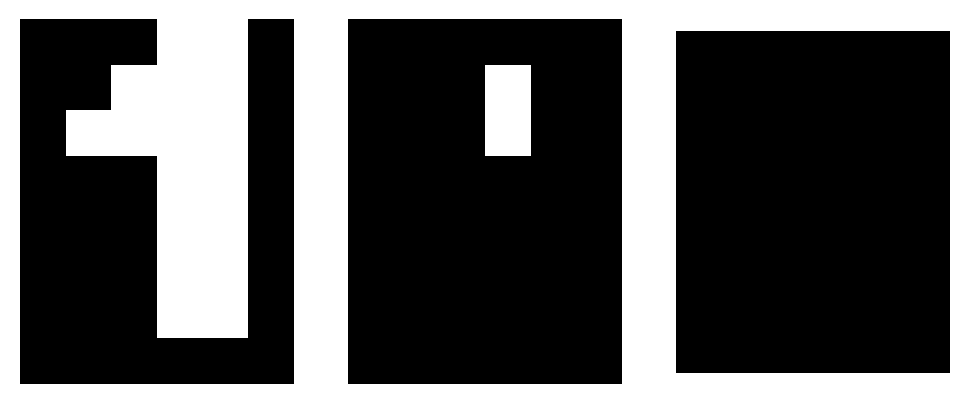

In [ ]:
def our_erosion(image, se):
 
  def generate_size(se, coord):
    if se.shape[coord]==1:
      return 1
    else:
      return int((se.shape[coord] - se.shape[coord]%2)/2)

  dim_y = generate_size(se, 0) 
  dim_x = generate_size(se, 1) 
  
  new_matrix_y=image.shape[0]+int(2*dim_y)
  new_matrix_x=image.shape[1]+int(2*dim_x)

  processed_image = np.ones((new_matrix_y,new_matrix_x))
  processed_image[dim_y:(dim_y + image.shape[0]), dim_x:(dim_x + image.shape[1])] = image
  final_image = np.zeros((new_matrix_y,new_matrix_x))


  for y in range (dim_y,processed_image.shape[0]):
    for x in range (dim_x,processed_image.shape[1]):
      if ( ((y+2*dim_y)< processed_image.shape[0]) and ((x+2*dim_x) < processed_image.shape[1]) ) :
        temp = np.min((processed_image[y-dim_y:y+dim_y+1,x-dim_x:x+dim_x+1])* se )
        final_image[y,x] = temp
  
  return final_image 


image=np.array([[0,0,0,1,1,0], [0,0,1,1,1,0], [0,1,1,1,1,0], [0,0,0,1,1,0],  [0,0,0,1,1,0], [0,0,0,1,1,0], [0,0,0,1,1,0],  [0,0,0,0,0,0]])
se=np.array([[0,1,0], [1,0,1],[0,1,0]])

IMG=our_erosion(image, se)

eroded_circle = nd.binary_erosion(image , se)

plt.figure(dpi=200)
plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray')
plt.axis('off')
plt.subplot(1, 3, 2)
plt.imshow(eroded_circle, cmap='gray')
plt.axis('off')
plt.subplot(1, 3, 3)
plt.imshow(IMG, cmap='gray')
plt.axis('off')


In [ ]:
def our_opening(image, se):
 
  image2 = our_erosion(image, se)
  final_image = our_dilation(image2, se)
  
  return final_image 

def our_closing(image, se):
 
  image2 = our_dilation(image, se)
  final_image = our_erosion(image2, se)
  
  return final_image 

IMG_op=our_opening(image, se)
IMG_cl=our_closing(image, se)

opening = nd.binary_opening(image, se)
closing = nd.binary_closing(image, se)

plt.figure(dpi=200)
plt.subplot(1, 4, 1)
plt.imshow(IMG_op, cmap='gray')
plt.axis('off')
plt.subplot(1, 4, 2)
plt.imshow(opening, cmap='gray')
plt.axis('off')
plt.subplot(1, 4, 3)
plt.imshow(IMG_cl, cmap='gray')
plt.axis('off')
plt.subplot(1, 4, 4)
plt.imshow(closing, cmap='gray')
plt.axis('off')


In [ ]:
#Outer and inner edges
small_circle = generate_circle(64, 64, 32, 32, 8)
se = np.ones((1,3))

outer_edge = np.logical_and(nd.binary_dilation(small_circle, se), np.logical_not(small_circle))
inner_edge = np.logical_and(np.logical_not(nd.binary_erosion(small_circle, se)), small_circle)

plt.figure(dpi=300)
plt.subplot(1, 3, 1)
plt.imshow(small_circle, cmap='gray')
plt.axis('off')
plt.subplot(1, 3, 2)
plt.imshow(outer_edge, cmap='gray')
plt.axis('off')
plt.subplot(1, 3, 3)
plt.imshow(inner_edge, cmap='gray')
plt.axis('off')
plt.show()

